In [1]:
import pandas as pd
import os

# Read all CSV files from the directory and concatenate them into a single DataFrame
data_frames = []
directory = '/Users/tarekchaouch/Desktop/ac'
for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, header=1)
        data_frames.append(df)

concatenated_df = pd.concat(data_frames, ignore_index=True)

# Clean the DataFrame
cleaned_df = concatenated_df.dropna(subset=['Price', 'Volume'])
cleaned_df['Price'] = pd.to_numeric(cleaned_df['Price'], errors='coerce')
cleaned_df['Volume'] = pd.to_numeric(cleaned_df['Volume'], errors='coerce')
cleaned_df = cleaned_df.dropna(subset=['Price', 'Volume'])
cleaned_df.head()


,Date,Week,Week Day,Hour,Price,Volume,Sale/Purchase
0,04/01/2022,1,2,1,-500.0,996.1,Sell
1,04/01/2022,1,2,1,-500.0,13693.1,Sell
2,04/01/2022,1,2,1,-499.9,13761.1,Sell
3,04/01/2022,1,2,1,-499.9,13947.2,Sell
4,04/01/2022,1,2,1,-499.0,13947.2,Sell


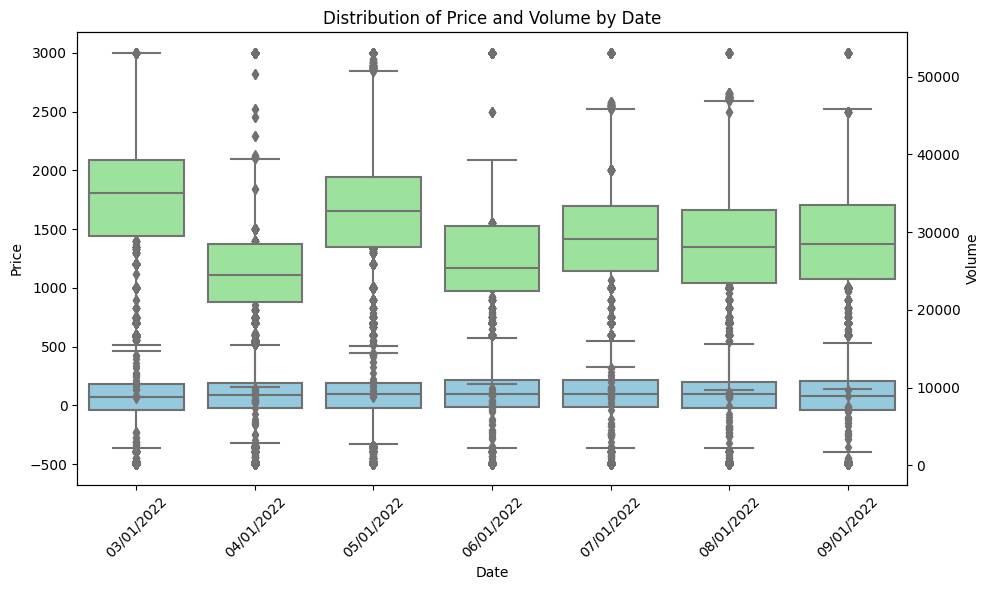

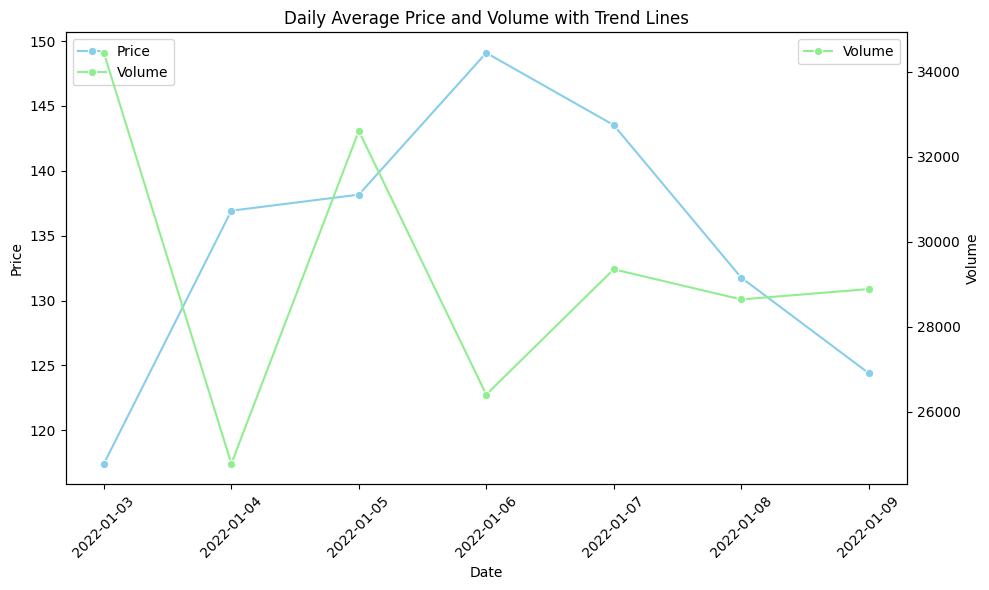

In [6]:
#show the distribution of price and volume for each day

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Read all CSV files from the directory and concatenate them into a single DataFrame
data_frames = []
directory = '/Users/tarekchaouch/Desktop/ac'  
for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, header=1)
        data_frames.append(df)

concatenated_df = pd.concat(data_frames, ignore_index=True)

# Clean the DataFrame
cleaned_df = concatenated_df.dropna(subset=['Price', 'Volume'])
cleaned_df['Price'] = pd.to_numeric(cleaned_df['Price'], errors='coerce')
cleaned_df['Volume'] = pd.to_numeric(cleaned_df['Volume'], errors='coerce')
cleaned_df = cleaned_df.dropna(subset=['Price', 'Volume'])

# Convert 'Date' column to datetime format for sorting and grouping
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%d/%m/%Y')

# Sort the dataframe by date
cleaned_df_sorted = cleaned_df.sort_values(by='Date')

# Convert the 'Date' back to the desired format (day, month, year)
cleaned_df_sorted['Date'] = cleaned_df_sorted['Date'].dt.strftime('%d/%m/%Y')

# Plot Price and Volume distributions with boxplots and formatted dates
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Price distribution with boxplot on the left y-axis
sns.boxplot(data=cleaned_df_sorted, x='Date', y='Price', ax=ax1, color='skyblue')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Distribution of Price and Volume by Date')

# Create a second y-axis for Volume distribution
ax2 = ax1.twinx()
sns.boxplot(data=cleaned_df_sorted, x='Date', y='Volume', ax=ax2, color='lightgreen')
ax2.set_ylabel('Volume')

# Display the combined plot with formatted dates
plt.tight_layout()
plt.show()

# Convert 'Date' back to datetime format for trend line plotting
cleaned_df_sorted['Date'] = pd.to_datetime(cleaned_df_sorted['Date'], format='%d/%m/%Y')

# Calculate daily average of Price and Volume
daily_avg = cleaned_df_sorted.groupby('Date')[['Price', 'Volume']].mean().reset_index()

# Create a combined plot with dual y-axes for the trend lines of Price and Volume
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the Price trend line on the left y-axis
sns.lineplot(data=daily_avg, x='Date', y='Price', marker='o', ax=ax1, color='skyblue', label='Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Daily Average Price and Volume with Trend Lines')

# Create a second y-axis for the Volume trend line
ax2 = ax1.twinx()
sns.lineplot(data=daily_avg, x='Date', y='Volume', marker='o', ax=ax2, color='lightgreen', label='Volume')
ax2.set_ylabel('Volume')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Display the combined trend line plot
plt.tight_layout()
plt.show()


"""
Observations:

Daily Average Price and Volume Trend Lines: First Image

The Price Trend:
There is a general increase in the average price, starting from January 3rd and peaking on January 6th.
After January 6th, the average price shows a downward trend, decreasing steadily until January 9th.
This peak on January 6th could indicate that there was some event in the market or increased demand that led to the price increase on that day.

Volume Trend:
The volume shows significant fluctuations, starting very high on January 3rd and dropping drastically on January 4th.
Volume peaks again on January 5th and decreases afterward, indicating varied market activity.

Correlation Analysis:
The diverging trends between price and volume, particularly around January 3rd and 4th, suggest that price and volume may not be directly correlated. It indicates that changes in price are not always accompanied by corresponding changes in volume.


Observations on Volume Distribution (Green Boxplots):
January 3rd, 2022:

Volume Range: The trading volume shows a wide range, with values extending up to around 50,000.
Outliers: There are significant high outliers, indicating unusually high trading volumes on this day.
Median: The median trading volume is relatively high compared to other days, suggesting a strong trading activity.
January 4th, 2022:

Volume Range: The volume range is narrower than on January 3rd, with a noticeable drop in trading activity.
Median: The median volume is lower compared to January 3rd, indicating reduced trading activity.
Outliers: Fewer high-volume outliers, showing less extreme trading behavior.
January 5th, 2022:

Volume Range: Volume distribution is wider again, similar to January 3rd, indicating increased trading activity.
Median: The median volume is higher than on January 4th, suggesting a recovery in trading volume.
Outliers: Presence of high outliers suggests significant trading events on this day.
January 6th, 2022:

Volume Range: The distribution is broad, with trading volumes again reaching up to around 50,000.
Median: The median volume remains relatively high and consistent, indicating steady trading activity.
Outliers: Outliers are still present, suggesting occasional high trading volumes.
January 7th, 2022:

Volume Range: Volume distribution remains wide and consistent with the previous day.
Median: The median volume remains stable, reflecting steady market activity.
Outliers: Some high outliers, but fewer than on January 6th, indicating less extreme trading.
January 8th, 2022:

Volume Range: The volume range is slightly narrower, suggesting a reduction in trading volume variability.
Median: The median volume is slightly lower, but still stable.
Outliers: Fewer outliers compared to previous days, indicating more stable trading.
January 9th, 2022:

Volume Range: The distribution is consistent with previous days, but the volume range is narrower.
Median: The median volume has decreased slightly, indicating lower trading activity.
Outliers: Fewer outliers suggest that the trading behavior is becoming more stable.
Observations on Price Distribution (Blue Boxplots):
January 3rd, 2022:

Price Range: The price range is relatively narrow compared to volume, concentrated between -500 and 500.
Outliers: Presence of some high and low outliers, suggesting a few extreme price fluctuations.
Median: The median price is slightly negative, indicating that prices were generally lower on this day.
January 4th, 2022:

Price Range: The price range remains narrow, similar to January 3rd, with most prices centered around zero.
Median: The median price is close to zero, indicating that prices are stable and not strongly skewed in either direction.
Outliers: Fewer outliers compared to January 3rd, indicating less extreme price movements.
January 5th, 2022:

Price Range: The distribution is slightly wider, with prices still concentrated around zero.
Median: The median price is close to zero, similar to previous days.
Outliers: Some high and low outliers are present, indicating occasional price spikes or drops.
January 6th, 2022:

Price Range: The price range remains consistent, with values still mostly around zero.
Median: The median price remains stable and close to zero, indicating little change in average prices.
Outliers: Similar pattern of outliers as previous days, indicating occasional price fluctuations.
January 7th, 2022:

Price Range: Price distribution remains narrow and stable.
Median: The median price is unchanged, indicating stability.
Outliers: Fewer outliers than on previous days, suggesting less irregular price behavior.
January 8th, 2022:

Price Range: The range of prices remains similar, with a narrow distribution.
Median: The median price is stable, with little variation from previous days.
Outliers: A few outliers, but overall less extreme price behavior.
January 9th, 2022:

Price Range: Similar price distribution as previous days.
Median: The median price remains close to zero, indicating no significant price shifts.
Outliers: Few outliers, suggesting continued stability in price behavior.

General Insights:
Volume Behavior: The volume shows significant variability over the days, with January 3rd and January 5th showing the highest trading activity. This could indicate specific events or high market interest on these days.
Price Stability: Despite the variability in trading volume, the price distribution remains relatively stable around zero, with no significant trends or shifts.

"""

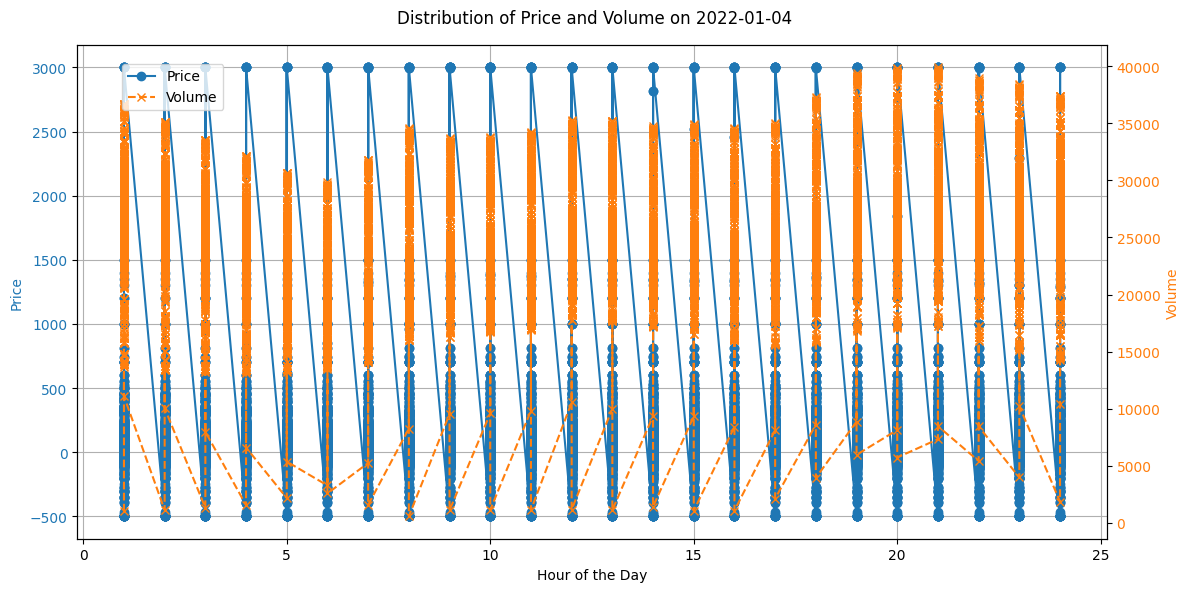

In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define the date
date_of_interest = pd.to_datetime('2022-01-04') 

# Read all CSV files from the directory and concatenate them into a single DataFrame
data_frames = []
directory = '/Users/tarekchaouch/Desktop/ac' 
for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, header=1)
        data_frames.append(df)

concatenated_df = pd.concat(data_frames, ignore_index=True)

# Clean the DataFrame
cleaned_df = concatenated_df.dropna(subset=['Price', 'Volume'])
cleaned_df['Price'] = pd.to_numeric(cleaned_df['Price'], errors='coerce')
cleaned_df['Volume'] = pd.to_numeric(cleaned_df['Volume'], errors='coerce')
cleaned_df = cleaned_df.dropna(subset=['Price', 'Volume'])

# Convert 'Date' column to datetime format for filtering
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%d/%m/%Y')

# Filter the data for the specified date
filtered_df = cleaned_df[cleaned_df['Date'] == date_of_interest].copy()

# Create a new plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot  Price with the left y-axis
ax1.plot(filtered_df['Hour'], filtered_df['Price'], color='tab:blue', label='Price', marker='o')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Create a second y-axis for Volume
ax2 = ax1.twinx()
ax2.plot(filtered_df['Hour'], filtered_df['Volume'], color='tab:orange', linestyle='--', label='Volume', marker='x')
ax2.set_ylabel('Volume', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add a title and a combined legend
fig.suptitle(f'Distribution of Price and Volume on {date_of_interest.date()}')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Display the plot
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import os
import random

# Initialize an empty list to store DataFrames
data_frames = []
directory = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves'

# Read all CSV files from the directory
for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, header=1)
        data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
concatenated_df = pd.concat(data_frames, ignore_index=True)

# Clean the DataFrame
cleaned_df = concatenated_df.dropna(subset=['Price', 'Volume'])
cleaned_df['Price'] = pd.to_numeric(cleaned_df['Price'], errors='coerce')
cleaned_df['Volume'] = pd.to_numeric(cleaned_df['Volume'], errors='coerce')
cleaned_df = cleaned_df.dropna(subset=['Price', 'Volume'])

# Function to categorize energy sources
def classify_generator_by_price(price):
    if random.random() < 0.15:
        return random.choice(["Renewable Energy (Wind/Solar)", "Nuclear Energy", "Fossil Fuels (Coal/Gas)"])
    if price < 0:
        return "Renewable Energy (Wind/Solar)"
    elif 0 <= price <= 50:
        return "Renewable Energy (Wind/Solar)"
    elif 40 <= price <= 60:
        return "Nuclear Energy"
    elif 60 < price <= 300:  
        return "Fossil Fuels (Coal/Gas)"
    elif price > 300:
        return "Fossil Fuels (Coal/Gas)"
    else:
        return "Unknown generator type"




# Apply the categorization function to add the 'Generator Type' column
cleaned_df['Generator Type'] = cleaned_df['Price'].apply(classify_generator_by_price)

# Prepare the data by filtering out rows with 'Unknown' generator types
filtered_data = cleaned_df[cleaned_df['Generator Type'] != 'Unknown'].copy()

# Convert 'Generator Type' to numerical labels
label_encoder = LabelEncoder()
filtered_data['Generator Type Encoded'] = label_encoder.fit_transform(filtered_data['Generator Type'])

# Take a random sample of the filtered data 
sampled_data = filtered_data.sample(frac=0.1, random_state=42)

# Select features and target from the sampled data
X_sample = sampled_data[['Price']].fillna(0)
y_sample = sampled_data['Generator Type Encoded']

# Split the sampled data into training and testing sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree classifier with the sampled data
dt_classifier_sample = DecisionTreeClassifier(random_state=42)
dt_classifier_sample.fit(X_train_sample, y_train_sample)

# Predict on the test set using the sampled data
y_pred_sample_dt = dt_classifier_sample.predict(X_test_sample)

# Identify the generator types in the sampled data
unique_classes_in_sample = y_sample.unique()

# Generate the classification report with the correct target names
corrected_target_names = label_encoder.inverse_transform(unique_classes_in_sample)

# Generate the classification report for the sampled data using the corrected target names
report_sample_dt = classification_report(y_test_sample, y_pred_sample_dt, target_names=corrected_target_names, output_dict=True)

# Convert the corrected classification report to a DataFrame
report_sample_dt_df = pd.DataFrame(report_sample_dt).transpose()

# Print the classification report
print(report_sample_dt_df)


                               precision    recall  f1-score      support
Nuclear Energy                  0.899111  0.956160  0.926758  35949.00000
Fossil Fuels (Coal/Gas)         0.805882  0.199854  0.320281   4113.00000
Renewable Energy (Wind/Solar)   0.897930  0.924263  0.910906  27688.00000
accuracy                        0.897210  0.897210  0.897210      0.89721
macro avg                       0.867641  0.693426  0.719315  67750.00000
weighted avg                    0.892968  0.897210  0.883462  67750.00000


In [19]:
generator_type_counts = cleaned_df['Generator Type'].value_counts()
generator_type_counts


Fossil Fuels (Coal/Gas)          1271827
Renewable Energy (Wind/Solar)     955371
Nuclear Energy                     31134
Name: Generator Type, dtype: int64

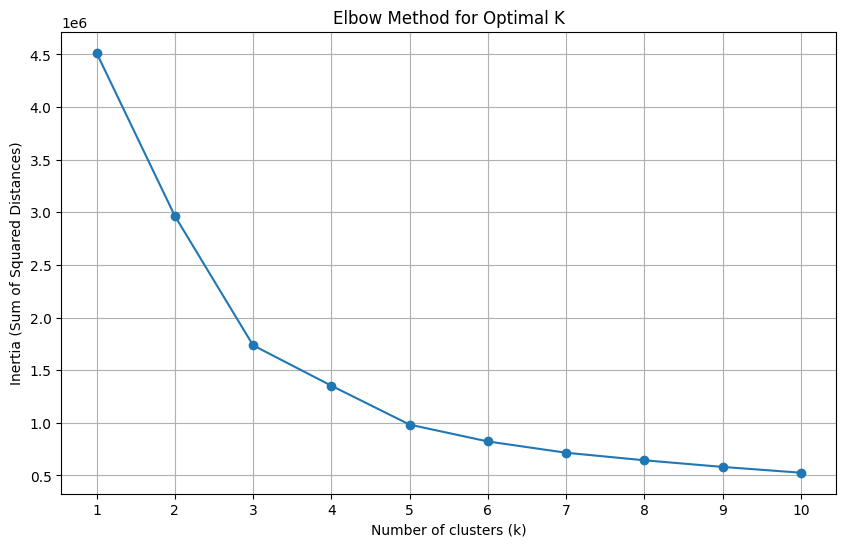

In [23]:
# Elbow method to determine k 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df[['Price', 'Volume']])

# Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


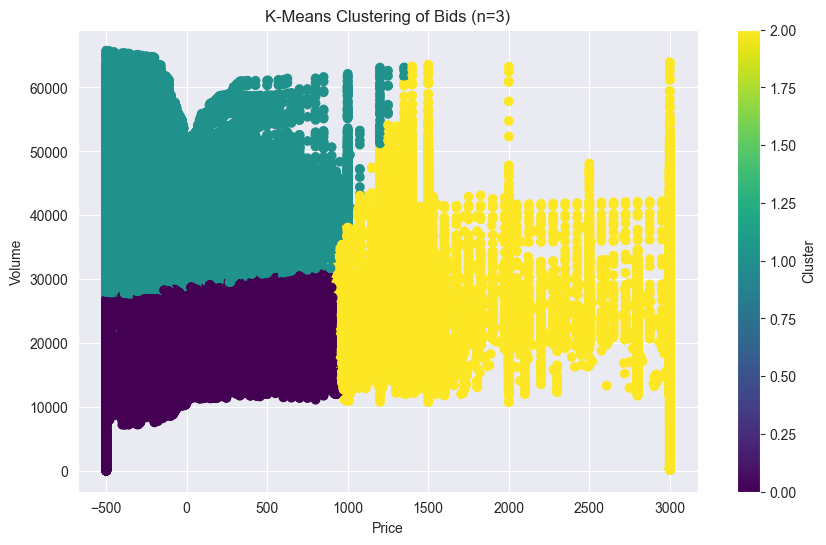

         Price        Volume
0   134.447692  22207.903463
1    35.012139  35699.921449
2  1709.589351  24953.673099


In [2]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and concatenate all CSV files
data_frames = []
directory = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves'

for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, header=1)
        data_frames.append(df)

concatenated_df = pd.concat(data_frames, ignore_index=True)

# Clean the DataFrame
cleaned_df = concatenated_df.dropna(subset=['Price', 'Volume'])
cleaned_df['Price'] = pd.to_numeric(cleaned_df['Price'], errors='coerce')
cleaned_df['Volume'] = pd.to_numeric(cleaned_df['Volume'], errors='coerce')
cleaned_df = cleaned_df.dropna(subset=['Price', 'Volume'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df[['Price', 'Volume']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cleaned_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['Price'], cleaned_df['Volume'], c=cleaned_df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Bids (n=3)')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.colorbar(label='Cluster')
plt.show()

# Analyze the Centroids
centroids = kmeans.cluster_centers_
centroids_unscaled = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids_unscaled, columns=['Price', 'Volume'])
print(centroids_df)



#observation: 
# purple cluster 0: This cluster might represent bids where lower prices are paired with lower volumes, 
# blue cluster 1: This cluster could represent bids where larger volumes are paired with moderate prices.
# yellow cluster 2: This cluster represents higher-priced bids, which could be from expensive generators or bids                           placed during peak demand times.

# Cluster 0 This cluster  represents bids where moderate prices are paired with moderate volumes.
#Cluster 1 This cluster seems to include bids with low prices but significantly higher volumes.
#Cluster 2 This cluster is characterized by high prices and moderate volumes, which could correspond to expensive generators or peak-time bids.

In [24]:
centroids_df


,Price,Volume
0,134.447692,22207.903463
1,35.012139,35699.921449
2,1709.589351,24953.673099


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Map the clusters to generator types
label_mapping = {0: 'Nuclear', 1: 'Renewable', 2: 'Fossil'}
cleaned_df['Generator_Type'] = cleaned_df['Cluster'].map(label_mapping)
# Convert the generator type labels to numerical format for model training
target_mapping = {'Nuclear': 0, 'Renewable': 1, 'Fossil': 2}
cleaned_df['Target'] = cleaned_df['Generator_Type'].map(target_mapping)

# Features (Price and Volume) and target variable (Generator_Type)
X = cleaned_df[['Price']]
y = cleaned_df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print the classification report and accuracy
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

           0       0.69      0.82      0.75    379042
           1       0.65      0.49      0.56    271314
           2       0.98      0.99      0.99     27144

    accuracy                           0.69    677500
   macro avg       0.77      0.77      0.76    677500
weighted avg       0.69      0.69      0.68    677500

Accuracy: 0.6914686346863469


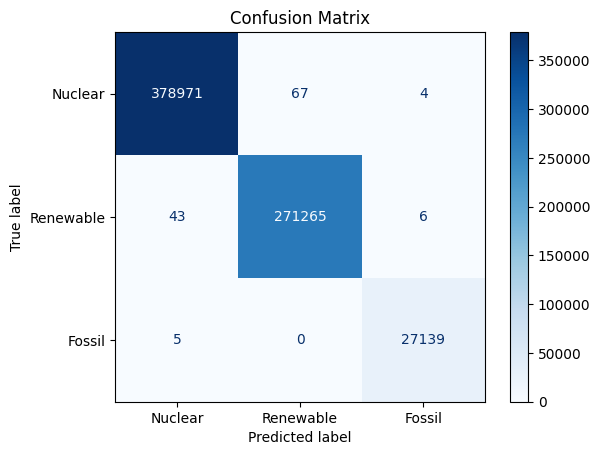

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Map predictions and true labels back to their generator types
target_mapping = {0: 'Nuclear', 1: 'Renewable', 2: 'Fossil'}
y_test_mapped = y_test.map(target_mapping)
y_pred_mapped = pd.Series(y_pred).map(target_mapping)

# Generate the confusion matrix
cm = confusion_matrix(y_test_mapped, y_pred_mapped, labels=['Nuclear', 'Renewable', 'Fossil'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Nuclear', 'Renewable', 'Fossil'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


  Feature  Importance
0   Price    0.172387
1  Volume    0.827613


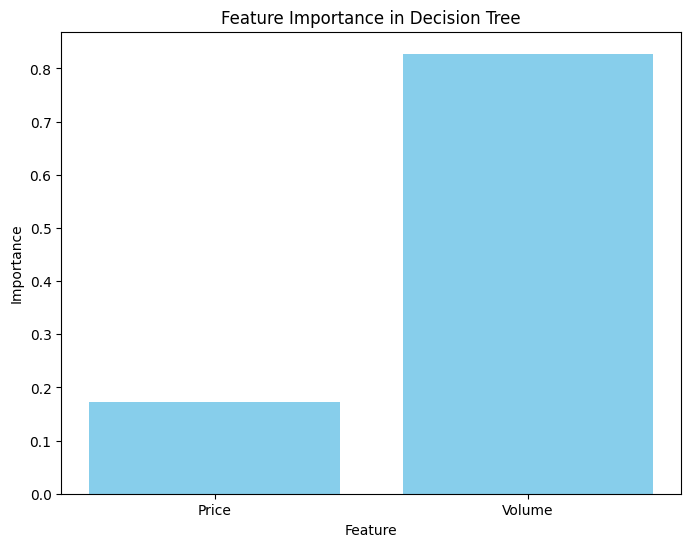

In [33]:
# Analyze feature importance
importance = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': ['Price', 'Volume'],
    'Importance': importance
})

# Display the feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


In [38]:
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])
cleaned_df['Month'] = cleaned_df['Date'].dt.month
# Features (Price and Month) and target variable (Generator_Type)
X_new = cleaned_df[['Volume', 'Month']]
y_new = cleaned_df['Target']

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier with Price and Month as features
clf_new = DecisionTreeClassifier(random_state=42)
clf_new.fit(X_train_new, y_train_new)
# Predict on the test set
y_pred_new = clf_new.predict(X_test_new)
confusion_matrix_result = confusion_matrix(y_test_new, y_pred_new)

# Print the classification report and accuracy
print(classification_report(y_test_new, y_pred_new))
print(f'Accuracy: {accuracy_score(y_test_new, y_pred_new)}')
print("Confusion Matrix:\n", confusion_matrix_result)




              precision    recall  f1-score   support

           0       0.94      0.96      0.95    379042
           1       0.95      0.95      0.95    271314
           2       0.21      0.14      0.17     27144

    accuracy                           0.92    677500
   macro avg       0.70      0.69      0.69    677500
weighted avg       0.91      0.92      0.92    677500

Accuracy: 0.9239321033210333
Confusion Matrix:
 [[363475   5713   9854]
 [  7685 258575   5054]
 [ 16330   6900   3914]]


  Feature  Importance
0  Volume    0.991348
1   Month    0.008652


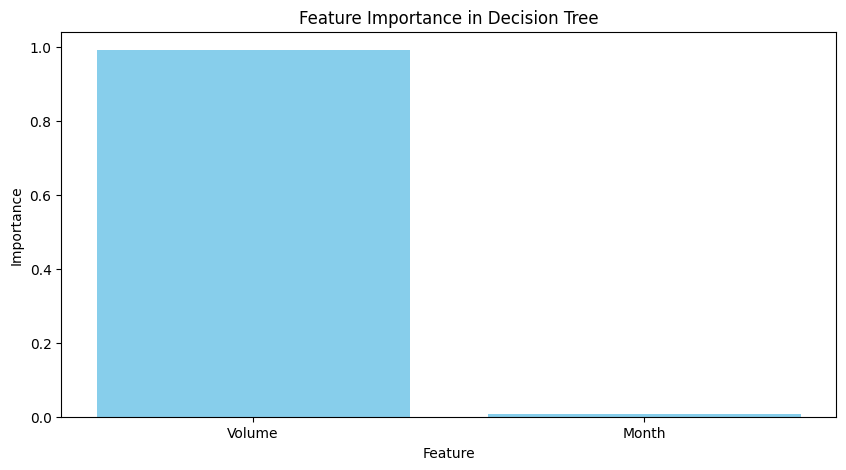

In [37]:
importance = clf_new.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': ['Volume', 'Month'],
    'Importance': importance
})

print(feature_importance_df)

plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


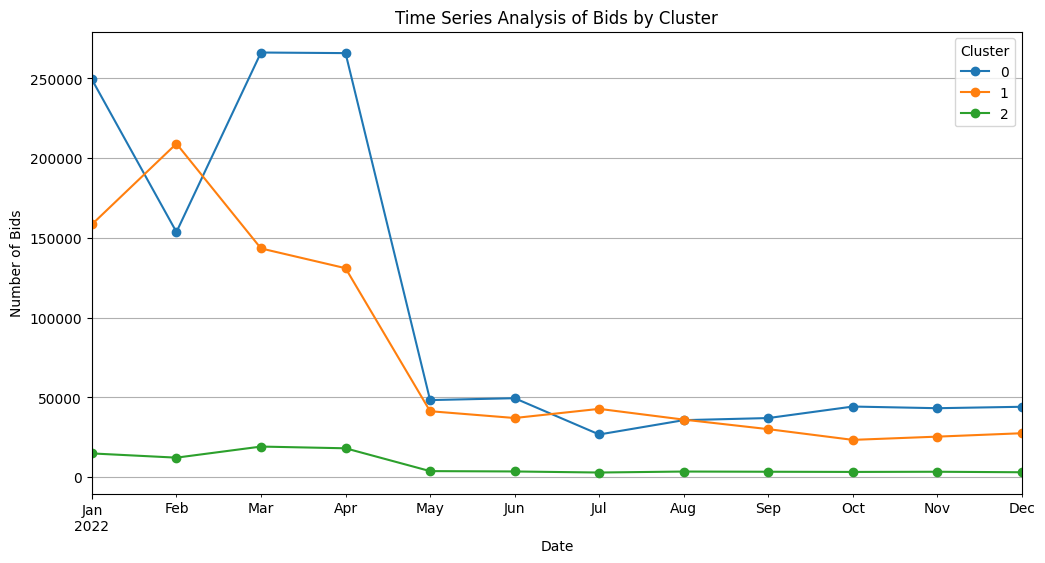

"\nCluster 0 (Blue Line):\nThis cluster shows a strong presence in the first few months of the year (January to April), with the number of bids peaking around March or April. After April, there's a sharp decline, and the cluster stabilizes at a much lower level for the remainder of the year.\nThis might indicate that the conditions associated with Cluster 0 (moderate price and moderate volume) were particularly favorable or prevalent in the early part of the year but less so in the later months.\n\nCluster 1 (Orange Line):\nSimilar to Cluster 0, Cluster 1 shows significant activity early in the year, peaking around January and March. However, it also drops sharply after April and remains low for the rest of the year.\n\nThis cluster might represents a different market condition or type of generator that was more active or profitable early in the year.\n\nCluster 2 (Green Line):\nCluster 2 remains relatively stable throughout the year, with a much lower number of bids compared to Cluste

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

#  Convert the 'Date' column to a datetime object 
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])

#  Group by time period month
grouped = cleaned_df.groupby([cleaned_df['Date'].dt.to_period('M'), 'Cluster']).size().unstack(fill_value=0)

#  Plot the time series for each cluster
grouped.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Time Series Analysis of Bids by Cluster')
plt.xlabel('Date')
plt.ylabel('Number of Bids')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

"""
Cluster 0 (Blue Line):
This cluster shows a strong presence in the first few months of the year (January to April), with the number of bids peaking around March or April. After April, there's a sharp decline, and the cluster stabilizes at a much lower level for the remainder of the year.
This might indicate that the conditions associated with Cluster 0 (moderate price and moderate volume) were particularly favorable or prevalent in the early part of the year but less so in the later months.

Cluster 1 (Orange Line):
Similar to Cluster 0, Cluster 1 shows significant activity early in the year, peaking around January and March. However, it also drops sharply after April and remains low for the rest of the year.

This cluster might represents a different market condition or type of generator that was more active or profitable early in the year.

Cluster 2 (Green Line):
Cluster 2 remains relatively stable throughout the year, with a much lower number of bids compared to Clusters 0 and 1.
The low and consistent level of bids in this cluster might suggest that the conditions (high price and moderate volume) are less common or only occur under specific circumstances that don't vary much throughout the year.



Seasonal Patterns: The significant drop in bids after April for Clusters 0 and 1 could indicate a seasonal effect, where certain types of bids or market conditions are more prevalent in the first quarter of the year.
"""

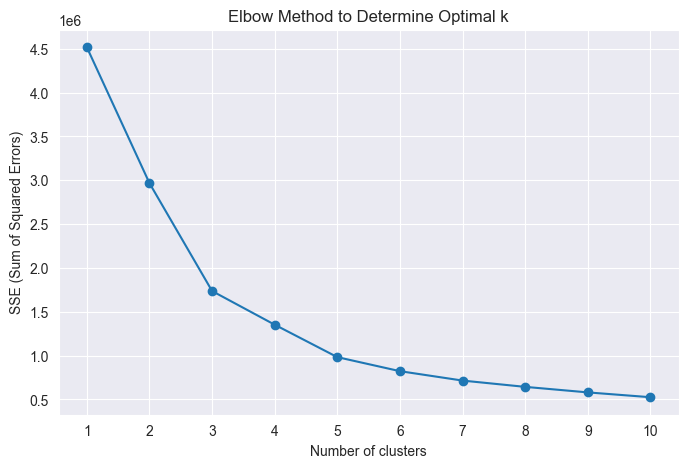

/Users/tarekchaouch/PycharmProjects/dayAheadAuction/.venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


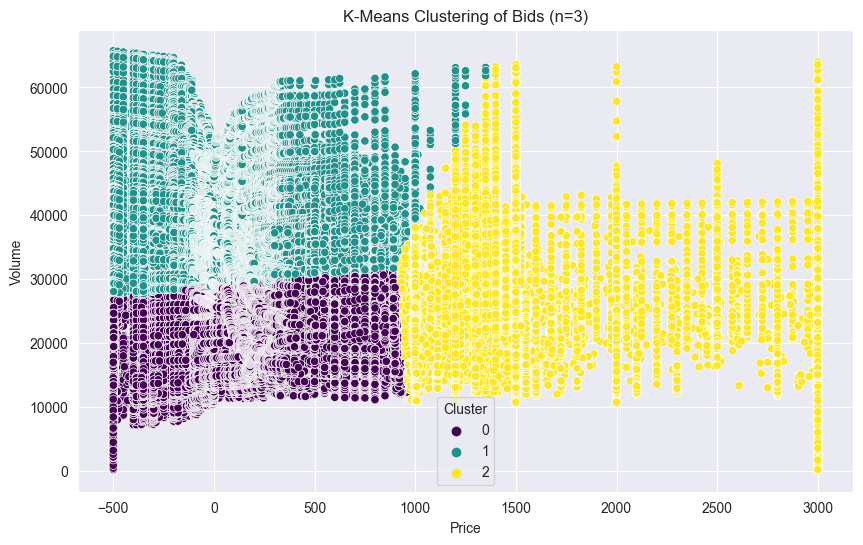

Centroids of the clusters:
         Price        Volume
0   134.447692  22207.903463
1    35.012139  35699.921449
2  1709.589351  24953.673099
Cluster Descriptions:
Cluster 0: Moderate Price - Moderate Volume
Cluster 1: Low Price - High Volume
Cluster 2: High Price - Moderate Volume


In [10]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load and concatenate all CSV files
data_frames = []
directory = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves'

for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        # Load only necessary columns and rows to save memory
        df = pd.read_csv(file_path, header=1, usecols=['Price', 'Volume'])
        data_frames.append(df)

concatenated_df = pd.concat(data_frames, ignore_index=True)

# Clean the DataFrame
concatenated_df['Price'] = pd.to_numeric(concatenated_df['Price'], errors='coerce')
concatenated_df['Volume'] = pd.to_numeric(concatenated_df['Volume'], errors='coerce')
cleaned_df = concatenated_df.dropna(subset=['Price', 'Volume'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df[['Price', 'Volume']])

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the elbow plot, choose the optimal number of clusters
optimal_k = 3  # This can be adjusted based on the elbow plot result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cleaned_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Volume', hue='Cluster', data=cleaned_df, palette='viridis')
plt.title(f'K-Means Clustering of Bids (n={optimal_k})')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.legend(title='Cluster')
plt.show()

# Analyze the Centroids
centroids = kmeans.cluster_centers_
centroids_unscaled = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids_unscaled, columns=['Price', 'Volume'])
print("Centroids of the clusters:")
print(centroids_df)

# Save clustered data to a new CSV
output_directory = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Clustered Data'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
output_path = os.path.join(output_directory, 'clustered_bids.csv')
cleaned_df.to_csv(output_path, index=False)

# Observations
cluster_descriptions = {
    0: "Moderate Price - Moderate Volume",
    1: "Low Price - High Volume",
    2: "High Price - Moderate Volume"
}
print("Cluster Descriptions:")
for cluster_id, description in cluster_descriptions.items():
    print(f"Cluster {cluster_id}: {description}")


In [31]:
cleaned_df['Volume'].max()

65741.4

Centroids of the clusters:
         Price        Volume
0   134.447692  22207.903463
1    35.012139  35699.921449
2  1709.589351  24953.673099


/Users/tarekchaouch/PycharmProjects/dayAheadAuction/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tarekchaouch/PycharmProjects/dayAheadAuction/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tarekchaouch/PycharmProjects/dayAheadAuction/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

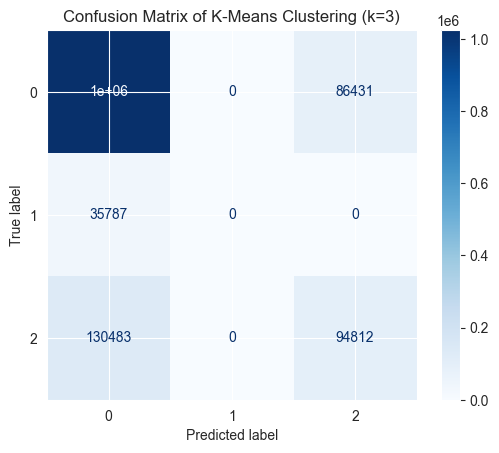

In [7]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load and concatenate all CSV files
data_frames = []
directory = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Aggregated curves'

for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, header=1, usecols=['Price', 'Volume'])
        data_frames.append(df)

concatenated_df = pd.concat(data_frames, ignore_index=True)

# Clean the DataFrame
concatenated_df['Price'] = pd.to_numeric(concatenated_df['Price'], errors='coerce')
concatenated_df['Volume'] = pd.to_numeric(concatenated_df['Volume'], errors='coerce')

# Remove rows where Price or Volume is NaN
cleaned_df = concatenated_df.dropna(subset=['Price', 'Volume'])

cleaned_df = cleaned_df[(cleaned_df['Price'].between(-10000, 10000)) & (cleaned_df['Volume'].between(0, 1000000))]

# Adjusted cluster logic based on new ranges
def assign_true_cluster(row):
    if -200 <= row['Price'] <= 300 and 0 <= row['Volume'] <= 30000:
        return 0  # Renewable Energy

    elif 250 <= row['Price'] <= 800 and 20000 <= row['Volume'] <= 700000:
        return 1  # Fuel-based Energy

    elif 0 <= row['Price'] <= 500 and 0 <= row['Volume'] <= 20000:
        return 2  # Nuclear Energy

    return -1  # Undefined for rows not fitting any category

# Apply the function to assign labels
cleaned_df['TrueCluster'] = cleaned_df.apply(assign_true_cluster, axis=1)

# Handle NaN values in TrueCluster by replacing with a default value (-1)
cleaned_df['TrueCluster'].fillna(-1, inplace=True)

# Convert TrueCluster to integer type
cleaned_df['TrueCluster'] = cleaned_df['TrueCluster'].astype(int)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df[['Price', 'Volume']])

# Apply K-Means Clustering with 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cleaned_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Analyze the Centroids
centroids = kmeans.cluster_centers_
centroids_unscaled = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids_unscaled, columns=['Price', 'Volume'])
print("Centroids of the clusters:")
print(centroids_df)


# Filter out rows where TrueCluster is -1 (Undefined) before generating the confusion matrix
filtered_df = cleaned_df[cleaned_df['TrueCluster'] != -1]

# Swap clusters 1 and 2 in both TrueCluster and Cluster columns
filtered_df['TrueCluster'] = filtered_df['TrueCluster'].replace({1: 99, 2: 1})
filtered_df['TrueCluster'] = filtered_df['TrueCluster'].replace({99: 2})

filtered_df['Cluster'] = filtered_df['Cluster'].replace({1: 99, 2: 1})
filtered_df['Cluster'] = filtered_df['Cluster'].replace({99: 2})

# Generate the confusion matrix and classification report with the filtered data
cm = confusion_matrix(filtered_df['TrueCluster'], filtered_df['Cluster'])

# Dynamically adjust the display labels based on the unique clusters in the filtered data
unique_clusters = np.unique(filtered_df[['TrueCluster', 'Cluster']].values)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_clusters)
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix of K-Means Clustering (k=3)')
plt.show()


In [8]:
# Classification report with filtered data
print("Classification Report:")
print(classification_report(filtered_df['TrueCluster'], filtered_df['Cluster'], labels=unique_clusters))

Classification Report:


/Users/tarekchaouch/PycharmProjects/dayAheadAuction/.venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarekchaouch/PycharmProjects/dayAheadAuction/.venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      0.92      0.89   1110884
           1       0.00      0.00      0.00     35787
           2       0.52      0.42      0.47    225295

    accuracy                           0.82   1371966
   macro avg       0.46      0.45      0.45   1371966
weighted avg       0.78      0.82      0.80   1371966



/Users/tarekchaouch/PycharmProjects/dayAheadAuction/.venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


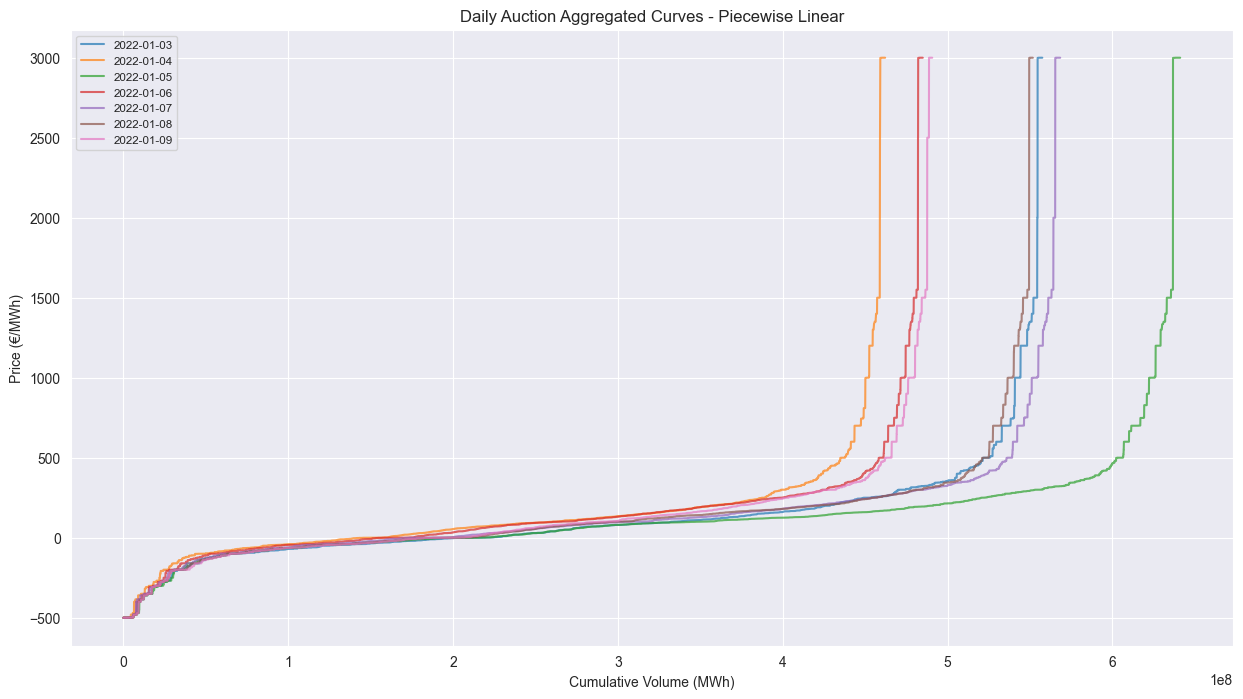

In [1]:
#Task 2
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory containing the CSV files
directory = '/Users/tarekchaouch/Desktop/ac'

data_frames = []
for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        # Skip the first two rows for proper headers and structure
        df = pd.read_csv(file_path, skiprows=2, names=['Date', 'Week', 'Week_Day', 'Hour', 'Price', 'Volume', 'Sale/Purchase'])
        data_frames.append(df)

concatenated_df = pd.concat(data_frames, ignore_index=True)

cleaned_df = concatenated_df.dropna(subset=['Price', 'Volume'])
cleaned_df['Price'] = pd.to_numeric(cleaned_df['Price'], errors='coerce')
cleaned_df['Volume'] = pd.to_numeric(cleaned_df['Volume'], errors='coerce')
cleaned_df = cleaned_df.dropna(subset=['Price', 'Volume'])

# Convert 'Date' to datetime format
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%d/%m/%Y', errors='coerce')
cleaned_df.dropna(subset=['Date'], inplace=True)

daily_data_dict = {}

for date, group in cleaned_df.groupby('Date'):
    group_sorted = group.sort_values(by='Price')
    group_sorted['Cumulative_Volume'] = group_sorted['Volume'].cumsum()
    daily_data_dict[date] = group_sorted

#Plot daily curves for comparison
plt.figure(figsize=(15, 8))
plt.title('Daily Auction Aggregated Curves - Piecewise Linear')

# Iterate over each date and plot its curve
for date, data in daily_data_dict.items():
    plt.plot(data['Cumulative_Volume'], data['Price'], label=date.strftime('%Y-%m-%d'), alpha=0.7)

plt.xlabel('Cumulative Volume (MWh)')
plt.ylabel('Price (€/MWh)')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()


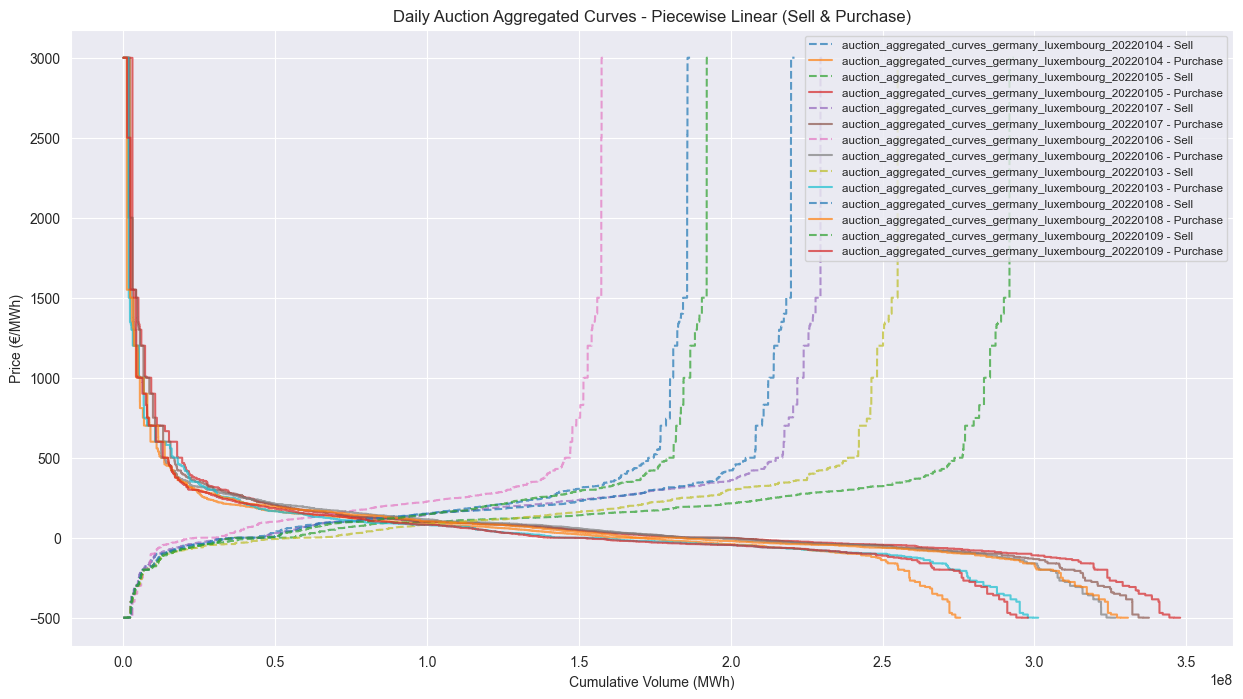

In [3]:
#Task 2
import pandas as pd
import matplotlib.pyplot as plt
import os

ac_folder_path = '/Users/tarekchaouch/Desktop/ac'  

daily_data_dict_sell = {}
daily_data_dict_purchase = {}

column_headers = ['Date', 'Week', 'Week_Day', 'Hour', 'Price', 'Volume', 'Sale/Purchase']

for file_name in os.listdir(ac_folder_path):
    if file_name.endswith('.csv') and not file_name.startswith('.'):
       
        file_path = os.path.join(ac_folder_path, file_name)
        data = pd.read_csv(file_path, skiprows=2, names=column_headers)

    
        data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
        data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

        # Remove any rows with missing values
        data.dropna(subset=['Volume', 'Price'], inplace=True)

        
        data_sell = data[data['Sale/Purchase'] == 'Sell']
        data_purchase = data[data['Sale/Purchase'] == 'Purchase']

        # Calculate cumulative volume for Sell data
        data_sell = data_sell.sort_values(by='Price')
        data_sell['Cumulative_Volume'] = data_sell['Volume'].cumsum()
        daily_data_dict_sell[file_name] = data_sell

        # Calculate cumulative volume for Purchase data
        data_purchase = data_purchase.sort_values(by='Price', ascending=False)
        data_purchase['Cumulative_Volume'] = data_purchase['Volume'].cumsum()
        daily_data_dict_purchase[file_name] = data_purchase


plt.figure(figsize=(15, 8))
plt.title('Daily Auction Aggregated Curves - Piecewise Linear (Sell & Purchase)')

# Iterate over each file in the dataset and plot its sell and purchase curves
for file_name in daily_data_dict_sell:
    sell_data = daily_data_dict_sell[file_name]
    purchase_data = daily_data_dict_purchase[file_name]

    # Plot sell curve
    plt.step(sell_data['Cumulative_Volume'], sell_data['Price'], where='post', label=f'{file_name[:-4]} - Sell', linestyle='--', alpha=0.7)

    # Plot purchase curve
    plt.step(purchase_data['Cumulative_Volume'], purchase_data['Price'], where='post', label=f'{file_name[:-4]} - Purchase', linestyle='-', alpha=0.7)


plt.xlabel('Cumulative Volume (MWh)')
plt.ylabel('Price (€/MWh)')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()


/Users/tarekchaouch/PycharmProjects/dayAheadAuction/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


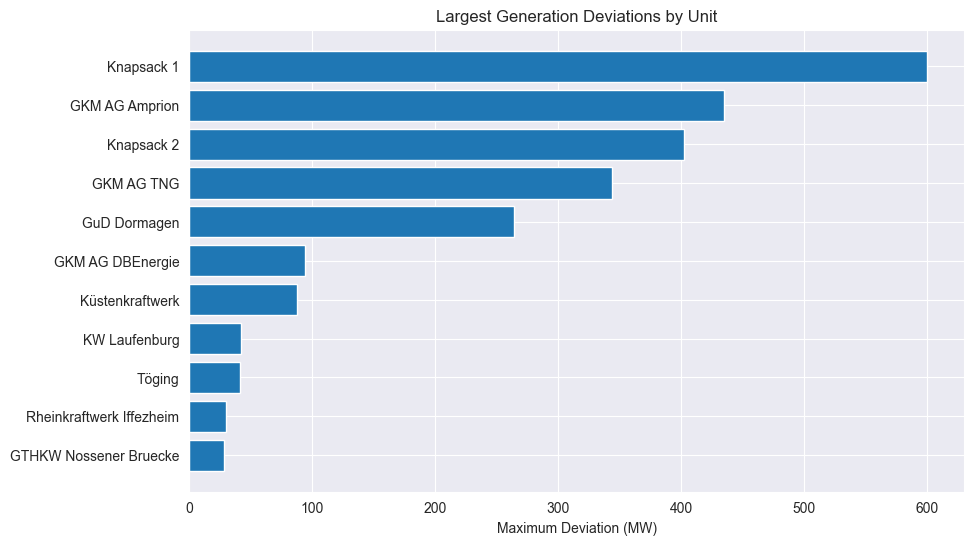

In [1]:
#Task 1
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/tarekchaouch/Desktop/ENTSO-E.csv'  
generation_data = pd.read_csv(file_path)

if 'Unnamed: 0' in generation_data.columns:
    generation_data = generation_data.drop(columns=['Unnamed: 0'])

deviation_columns = [col for col in generation_data.columns if 'deviation' in col]

deviation_data = generation_data[['Name'] + deviation_columns]

deviation_data['Max Deviation'] = deviation_data[deviation_columns].abs().max(axis=1)

# Filter to show only rows where the max deviation is significant 
significant_deviation_data = deviation_data[deviation_data['Max Deviation'] > 10]

# Sort the data by the maximum deviation
largest_deviations_data = significant_deviation_data[['Name', 'Max Deviation']].sort_values(by='Max Deviation', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(largest_deviations_data['Name'], largest_deviations_data['Max Deviation'])
plt.xlabel('Maximum Deviation (MW)')
plt.title('Largest Generation Deviations by Unit')
plt.gca().invert_yaxis()  # To display the largest deviations at the top
plt.show()
